# Há  aumento do IDH em países com mais computadores? E com usuários de internet?

# Introdução


### Nota-se que, desde o início do século XXI, artificíos tecnológicos começaram a nos servir cada vez mais no cotidiano. De fato, atualmente é raro se deparar com alguém que não esteja envolvido em algum tipo de rede social e internet. O fluxo de informação partiu de ser algo local para algo global.
### Diante disso, cabe descobrir se a partir de uma maior disposição de conteúdo, notícias de todos os lugares do mundo e acesso à conhecimento, as pessoas se tornam mais desenvolvidas.

### Observação: Foi incluído um segundo momento (2005) simplesmente para possível análise de desenvolvimento do cenário

# Importando Bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import os
meu_diretorio = "/Users/Alexandre Markiewicz/Documents/Insper/2 SEMESTRE/Cien. Dados/P1_AlexandreMF"
os.chdir(meu_diretorio)

# Dataframes utilizados

In [3]:
df_internet = pd.read_excel("Internet user total.xlsx")
df_IDH = pd.read_excel("Indicator_HDI.xlsx")
df_computers = pd.read_excel("indicator Personal computers (ITU estimates_MDG) .xls.xlsx")


# Anos utilizados

In [4]:
#======== 2000 =========
internet_2000 = df_internet.loc[:,["Internet users, total number","2000"]].rename(index=str, columns={"2000" : "internet 2000"})
IDH_2000 = df_IDH.loc[:,["HDI",2000]]
computers_2000 = df_computers.loc[:,["Personal computers",2000]].rename(index=str, columns={2000 : "2000_PCs"})


#======== 2005 =========
internet_2005 = df_internet.loc[:,["Internet users, total number","2005"]].rename(index=str, columns={"2005" : "internet 2005"})
IDH_2005 = df_IDH.loc[:,["HDI",2005]]
computers_2005 = df_computers.loc[:,["Personal computers",2005]]


# Set Index

In [5]:
#======== 2000 ========
int_indx = internet_2000.set_index("Internet users, total number")
IDH_indx = IDH_2000.set_index("HDI").add_suffix(" IDH")
comp_indx = computers_2000.set_index("Personal computers")

#======== 2005 ========
int_indx05 = internet_2005.set_index("Internet users, total number")
IDH_indx05 = IDH_2005.set_index("HDI")
comp_indx05 = computers_2005.set_index("Personal computers")

#======
x = comp_indx.sort_values(by= "2000_PCs").dropna()

# Dando join

In [6]:
data_1 = int_indx.join(IDH_indx, how='inner', lsuffix='_Internet Users', rsuffix='_IDH')
data_2 = comp_indx.join(data_1, how='inner', lsuffix='_PCs', rsuffix='_IDH')


data_1_05 = int_indx05.join(IDH_indx05, how='inner', lsuffix='_Internet Users', rsuffix='_IDH')
data_2_05 = comp_indx05.join(data_1_05, how='inner', lsuffix='_PCs', rsuffix='_IDH')

datajoin = data_2.join(data_2_05, how= 'inner', lsuffix='_PCs', rsuffix='_IDH')
datajoin.dropna(inplace=True)
datajoin.head()

datajoin

,2000_PCs,internet 2000,2000 IDH,2005_PCs,internet 2005,2005_IDH
Albania,25000.0,3.504906e+03,0.691,54000.0,1.898870e+05,0.721
Algeria,200000.0,1.501366e+05,0.624,350000.0,1.921982e+06,0.667
Angola,15000.0,1.462904e+04,0.384,93396.0,1.885300e+05,0.445
Argentina,2560000.0,2.599436e+06,0.749,3500000.0,6.854530e+06,0.765
Armenia,25000.0,4.000373e+04,0.643,297000.0,1.610541e+05,0.689
Austria,2900000.0,2.700000e+06,0.839,4996000.0,4.774674e+06,0.860
Bahrain,95000.0,3.927269e+04,0.773,128000.0,1.544110e+05,0.795
Bangladesh,200000.0,9.206160e+04,0.422,2250000.0,3.397129e+05,0.462
Belgium,2300000.0,2.994876e+06,0.876,3954000.0,6.228738e+06,0.873
Belize,30000.0,1.494012e+04,0.668,41000.0,2.587603e+04,0.689


## Tabela dos dataframes


# Função da reta

In [7]:
def reta(dados_x, dados_y, eixo_x, eixo_y, nome_grafico):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(nome_grafico)
    plt.xlabel(eixo_x)
    plt.ylabel(eixo_y)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()
    

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.61904835361376
Coeficiente angular: 2.721644055295244e-09


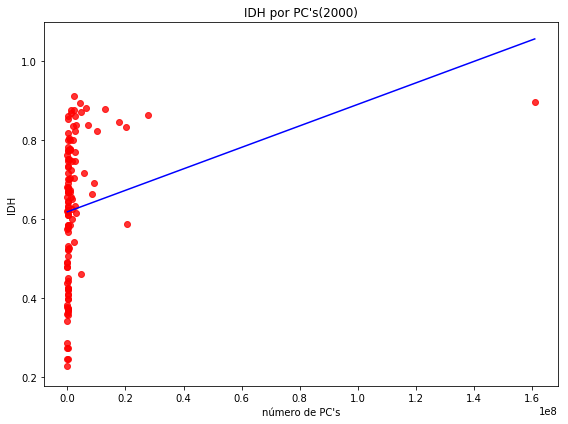

In [8]:
reta(datajoin["2000_PCs"], datajoin["2000 IDH"], "número de PC's", "IDH", "IDH por PC's(2000)")





## Utilizando tal gráfico não é tão nítido os resultados, logo foi usado "Log" para uma visualização mais aprofundada:

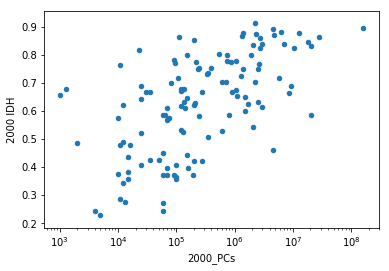

In [9]:
datajoin.plot.scatter(x="2000_PCs", y = "2000 IDH",  logx=True)

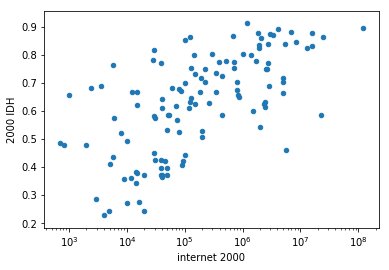

In [13]:
datajoin.plot.scatter(x="internet 2000", y = "2000 IDH",  logx=True)



In [14]:
datajoin.corr()

,2000_PCs,internet 2000,2000 IDH,2005_PCs,internet 2005,2005_IDH
2000_PCs,1.000000,0.993868,0.231642,0.983580,0.918196,0.222561
internet 2000,0.993868,1.000000,0.243309,0.986726,0.935468,0.234769
2000 IDH,0.231642,0.243309,1.000000,0.241838,0.234101,0.996799
2005_PCs,0.983580,0.986726,0.241838,1.000000,0.968663,0.234744
internet 2005,0.918196,0.935468,0.234101,0.968663,1.000000,0.230956
2005_IDH,0.222561,0.234769,0.996799,0.234744,0.230956,1.000000


## Conclusão

### Análise dos gráficos
### A partir dos resultados, tanto do gráfico quanto da tabela, nota-se que, desprezando certas anomalias, tanto o  número de computadores quanto o número de usuários não influencia no IDH das nações em geral. Isso provavelmente ocorre não só pela quantidade populacional que varia de país a país, mas também pela produção de tal produto dentre diversos fatores.
